In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
def importdata(): 
    balance_data = pd.read_csv('golf_dataset.csv') 
    balance_data['Outlook'].replace(['Rainy','Overcast','Sunny'],[0,1,2],inplace=True)
    balance_data['Temp'].replace(['Hot','Mild','Cool'],[0,1,2],inplace=True)
    balance_data['Humidity'].replace(['Normal','High'],[0,1],inplace=True)
    balance_data['Play Golf'].replace(['No','Yes'],[0,1],inplace=True)
    print ("Dataset: \n",balance_data.head()) 
    return balance_data
def splitdataset(balance_data):
    X = balance_data.values[:, 0:4]
    Y = balance_data.values[:, 4]
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 1)  
    return X, Y, X_train, X_test, y_train, y_test

In [4]:
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

Dataset: 
    Outlook  Temp  Humidity  Windy  Play Golf
0        0     0         1      0          0
1        0     0         1      1          0
2        1     0         1      0          1
3        2     1         1      0          1
4        2     2         0      0          1


In [6]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [7]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  
cm

array([[1, 0],
       [2, 2]], dtype=int64)

Accuracy: 0.6


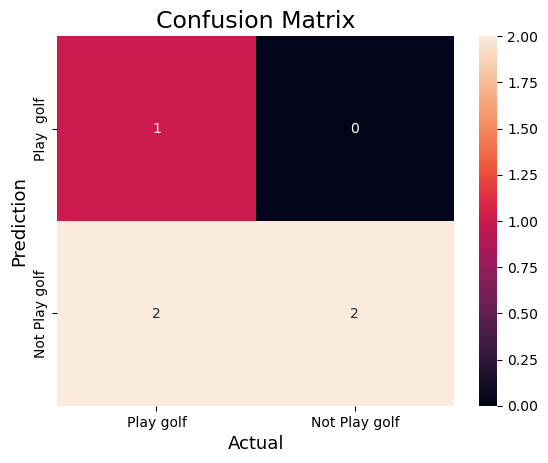

In [11]:

print("Accuracy:",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            xticklabels=['Play golf','Not Play golf'],
            yticklabels=['Play  golf','Not Play golf'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

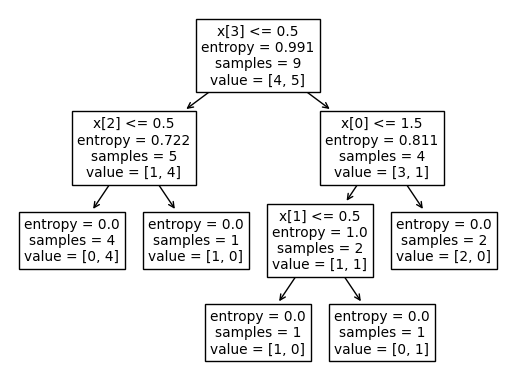

In [12]:
plot_tree(clf)
plt.show()